# Customer Lifetime Value

## Fake data

In [30]:
import pandas as pd
import numpy as np
from faker import Faker

def create_customer_data(num_customers=4500, price_min=30, price_alpha=0.65):
    fake = Faker()
    np.random.seed(42)
    
    customer_data = []
    
    for _ in range(num_customers):
        customer_id = fake.uuid4()
        
        # Generate price using Pareto distribution
        price = round((np.random.pareto(price_alpha) + 1) * price_min, 2)
        
        gross_margin = round(np.random.uniform(0.7, 0.9), 2)
        retention_rate = round(np.random.uniform(0.5, 1), 2)
        wacc = round(np.random.uniform(0.1, 0.2), 2)
        
        customer_data.append([
            customer_id,
            price,
            gross_margin,
            retention_rate,
            wacc
        ])
    
    columns = ['customer_id', 'price', 'gross_margin', 'retention_rate', 'wacc']
    return pd.DataFrame(customer_data, columns=columns)

# Generate the data
data = create_customer_data()
data

,customer_id,price,gross_margin,retention_rate,wacc
0,2af3f148-b03e-45cf-90a2-5cbf93f98826,61.75,0.89,0.87,0.16
1,aa36f36a-1978-45ee-86d2-b4fc9f5b1232,38.95,0.73,0.53,0.19
2,f5525e69-dde7-42a3-b6dc-b7b0704aeed0,123.37,0.84,0.51,0.20
3,5093da79-c623-4730-986a-9fc03b772d83,468.51,0.74,0.59,0.12
4,a3d8e6e2-b1d6-4c1d-9c24-9a51ffb127e4,52.42,0.80,0.72,0.13
...,...,...,...,...,...
4495,aa24ffdf-8b8f-4f40-847a-a15e7d58c858,77.84,0.73,0.86,0.12
4496,bc60b29b-c753-4c15-acda-13ae99ff7134,236.29,0.80,0.73,0.19
4497,de7c1611-d00f-4746-a404-1b9d2394a561,199.98,0.71,0.65,0.19
4498,1126553c-9174-4e97-b3c4-0f60b26093bd,30.87,0.81,0.86,0.16


## Calculate CLV

$$\mathbb{E}[\text{CLV}] = \dfrac{m (1 + d)}{1 + d -r}$$

- $m$ is contribution margin
- $d$ is discount rate or $\text{WACC}$
- $r$ is retention rate

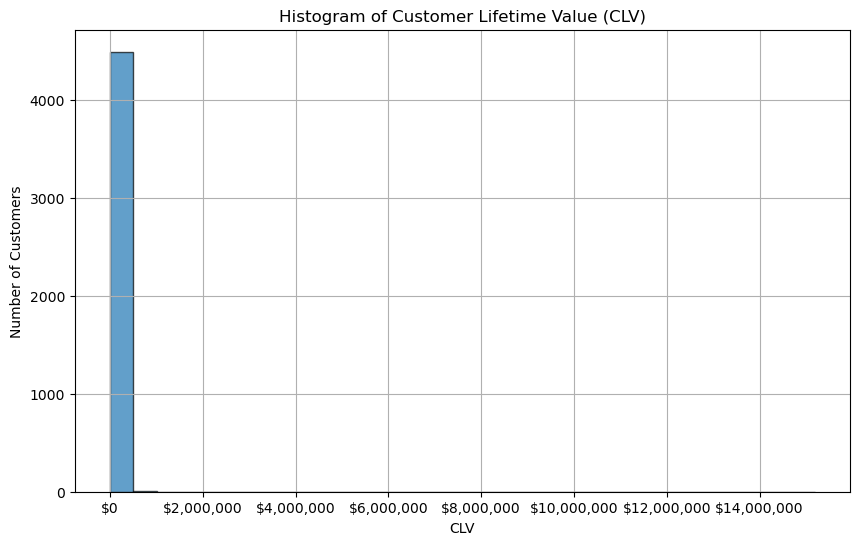

Customer Equity: $45,480,461.68
Top 1% customers' CLV share: 85.63%
Top 10% customers' CLV share: 96.60%
Top 20% customers' CLV share: 98.09%


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def calculate_clv(data):
    # Extract necessary columns
    price = data['price']
    gross_margin = data['gross_margin']
    retention_rate = data['retention_rate']
    wacc = data['wacc']
    
    # Calculate m, r, d
    m = price * gross_margin
    r = retention_rate
    d = wacc
    
    # Calculate CLV
    clv = (m * (1 + d)) / (1 + d - r)
    
    # Plot histogram of CLV
    plt.figure(figsize=(10, 6))
    plt.hist(clv, bins=30, edgecolor='k', alpha=0.7)
    plt.title('Histogram of Customer Lifetime Value (CLV)')
    plt.xlabel('CLV')
    plt.ylabel('Number of Customers')
    plt.grid(True)
    
    # Format x-axis labels as integers in dollar format
    formatter = FuncFormatter(lambda x, _: f'${int(x):,}')
    plt.gca().xaxis.set_major_formatter(formatter)
    
    plt.show()
    
    # Calculate and print Customer Equity
    customer_equity = np.sum(clv)
    print(f"Customer Equity: ${customer_equity:,.2f}")
    
    # Calculate % CLV share of the top 1%, top 10%, and top 20% of customers
    num_customers = len(clv)
    top_1_percent = int(np.ceil(0.01 * num_customers))
    top_10_percent = int(np.ceil(0.10 * num_customers))
    top_20_percent = int(np.ceil(0.20 * num_customers))
    
    clv_sorted = np.sort(clv)[::-1]  # Sort CLV in descending order
    clv_top_1_percent_share = np.sum(clv_sorted[:top_1_percent]) / customer_equity * 100
    clv_top_10_percent_share = np.sum(clv_sorted[:top_10_percent]) / customer_equity * 100
    clv_top_20_percent_share = np.sum(clv_sorted[:top_20_percent]) / customer_equity * 100
    
    print(f"Top 1% customers' CLV share: {clv_top_1_percent_share:.2f}%")
    print(f"Top 10% customers' CLV share: {clv_top_10_percent_share:.2f}%")
    print(f"Top 20% customers' CLV share: {clv_top_20_percent_share:.2f}%")

# Example usage
# Assuming 'data' is a DataFrame containing the relevant columns
calculate_clv(data)